# **Task 2**

---

## **Buidling a Machine Learning Model**

This task involves choosing an appropriate algorithm, training the model, and evaluating its performance. The goal is to create a model that can be easily understood and acted on by business stakeholders. 

The challenge lies in selecting the right machine learning algorithm and fine-tuning it to accurately predict which customers are at risk of leaving. This model will provide actionable insights, enabling the team to develop targeted interventions to retain valuable customers. Specifically, it is important to select the most appropriate machine learning algorithm, which balances predictive accuracy with interpretability

### **Data Preparation**


First, we must load the processed data from Task 1 and resample them with `SMOTE` method to tackle the **class imbalance** issue.

In [1]:
# Import data processing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load processed data
df = pd.read_csv("Data/processed_churn_csv")

Let's have a look at the current processed data: 

In [3]:
df.head()

,Age,TotalSpent,AvgSpent,NumTransactions,UniqueTransactions,ServiceInteractions,ResolutionRate,LoginFrequency,ChurnStatus,DaysSinceLastLogin,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,AgeGroup_<30,AgeGroup_>50
0,1.229628,-1.159172,2.134218,-1.557954,-1.557954,-0.002451,1.524083,0.575702,0,-1.021557,True,False,True,False,True,False,False,False,False,True
1,1.426547,0.386676,-0.353258,0.747849,0.747849,-0.002451,1.524083,-1.488513,1,-1.450763,True,True,False,False,True,False,False,True,False,True
2,-1.658518,0.599310,0.445651,0.363548,0.363548,-0.002451,1.524083,-1.630872,0,-1.260005,True,False,True,False,True,False,False,True,True,False
3,-1.461599,-0.474645,-0.831840,-0.020752,-0.020752,1.222911,0.347185,-1.702052,0,-0.477897,True,False,False,True,True,False,False,True,True,False
4,-1.461599,1.007342,0.017448,1.132149,1.132149,-1.227812,-0.829713,1.073961,0,-1.078785,True,False,False,False,False,True,False,True,True,False


We create different subsets to hold the predictive and target variable:

In [4]:
# Define model variables
X = df.drop(columns=["ChurnStatus"])
y = df["ChurnStatus"]

Apply `train_test_split` to split variables' arrays into random train and test subsets: 

In [5]:
# Split train, test sets for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

To handle **class imbalance** issue based on low number of churners (**only ~ 20% of the dataset**), we use **_SMOTE_** (Synthetic Minority Oversampling Technique) to boost the minority class in training set only.

In [6]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### **Crafting the Predictive Blueprint** 

The idea is to iterate on various models, tuning hyperparameters, and validating the model to ensure it generalises well to new data; therefore, we will train a collection of models to assess their overall performance.

For this project, we choose **Logistic Regression**, **Random Forest**, **XGBoost**. **Decision Tree** and **Neural Network** to train the processed data with a predefined grid of parameters.

In [7]:
# Define models and parameter grids
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1]
    },
    "Decision Tree": {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    },
    "Neural Network": {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['relu'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42)
}

Now we can fit these models with the resampled data, then evaluate their performance via confusion matrix and metrics such as precision score, recall and F1 score.


Tuning and evaluating Logistic Regression...
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
[[90 69]
 [28 13]]
              precision    recall  f1-score   support

           0       0.76      0.57      0.65       159
           1       0.16      0.32      0.21        41

    accuracy                           0.52       200
   macro avg       0.46      0.44      0.43       200
weighted avg       0.64      0.52      0.56       200

Precision: 0.15853658536585366
Recall: 0.3170731707317073
F1 Score: 0.21138211382113822
ROC-AUC: 0.4183156925908882


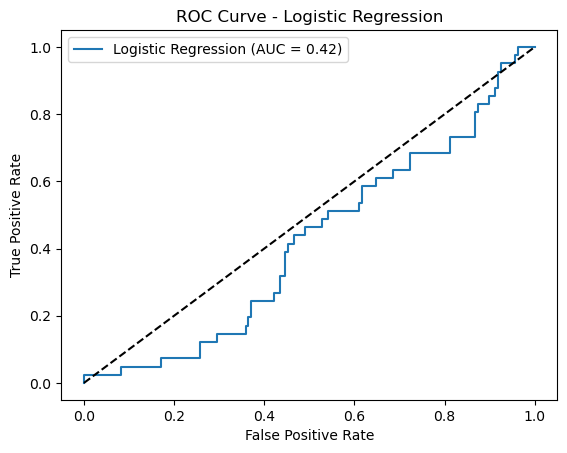

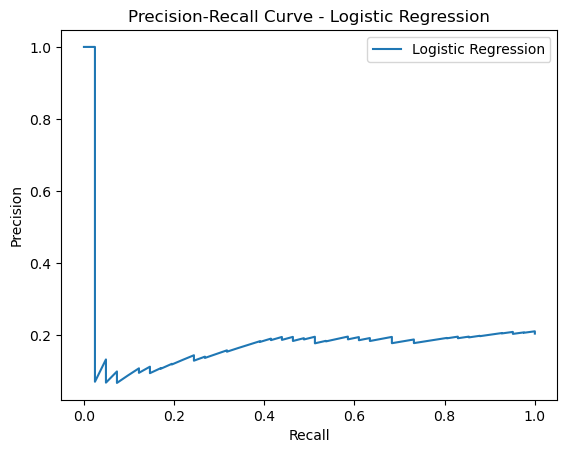


Tuning and evaluating Random Forest...
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
[[133  26]
 [ 37   4]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       159
           1       0.13      0.10      0.11        41

    accuracy                           0.69       200
   macro avg       0.46      0.47      0.46       200
weighted avg       0.65      0.69      0.67       200

Precision: 0.13333333333333333
Recall: 0.0975609756097561
F1 Score: 0.11267605633802817
ROC-AUC: 0.5102776499463109


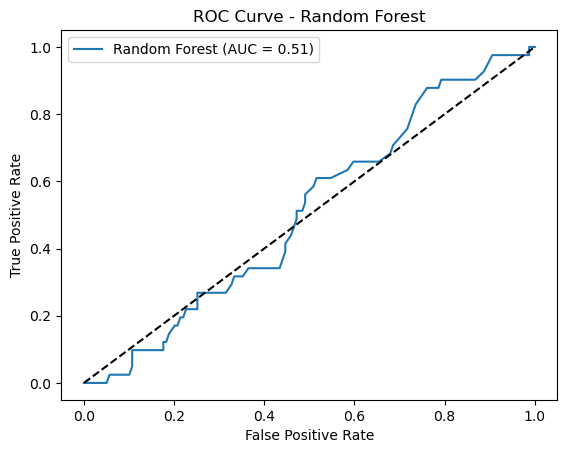

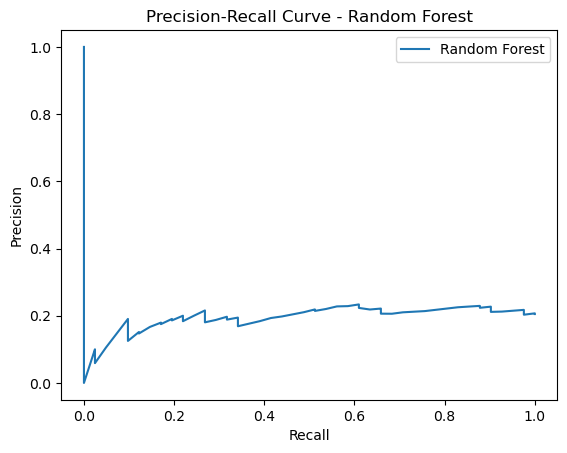


Tuning and evaluating XGBoost...
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
[[129  30]
 [ 38   3]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       159
           1       0.09      0.07      0.08        41

    accuracy                           0.66       200
   macro avg       0.43      0.44      0.44       200
weighted avg       0.63      0.66      0.65       200

Precision: 0.09090909090909091
Recall: 0.07317073170731707
F1 Score: 0.08108108108108109
ROC-AUC: 0.5077465868998312


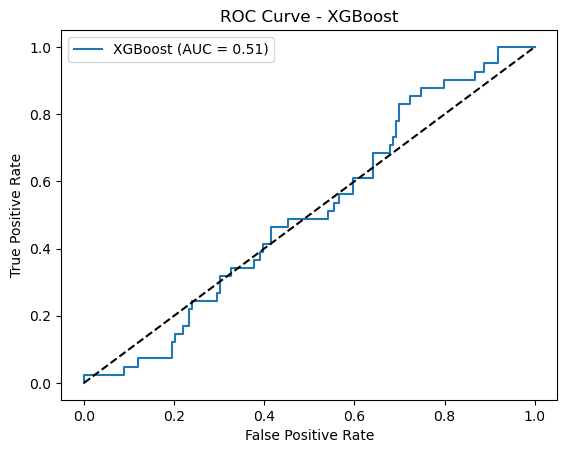

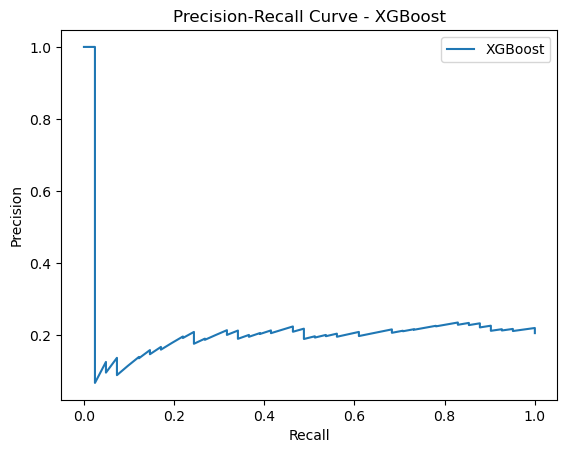


Tuning and evaluating Decision Tree...
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
[[113  46]
 [ 28  13]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       159
           1       0.22      0.32      0.26        41

    accuracy                           0.63       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.68      0.63      0.65       200

Precision: 0.22033898305084745
Recall: 0.3170731707317073
F1 Score: 0.26
ROC-AUC: 0.5138824973155393


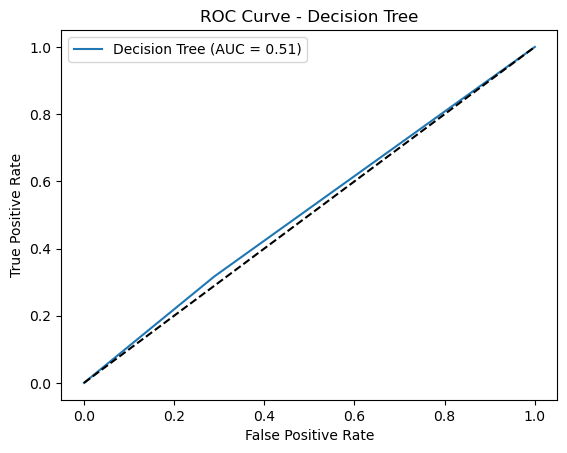

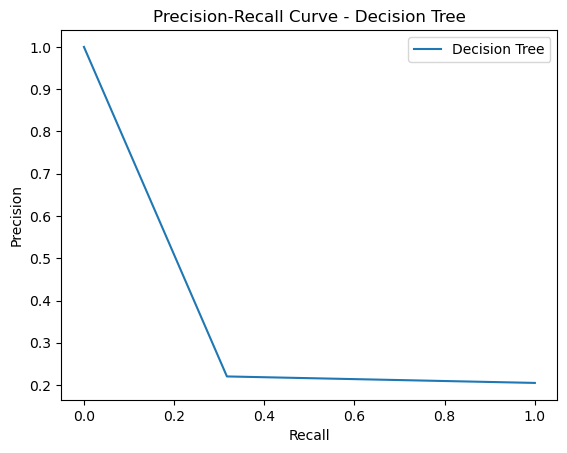


Tuning and evaluating Neural Network...
Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
[[123  36]
 [ 30  11]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       159
           1       0.23      0.27      0.25        41

    accuracy                           0.67       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.69      0.67      0.68       200

Precision: 0.23404255319148937
Recall: 0.2682926829268293
F1 Score: 0.25
ROC-AUC: 0.490105844454671


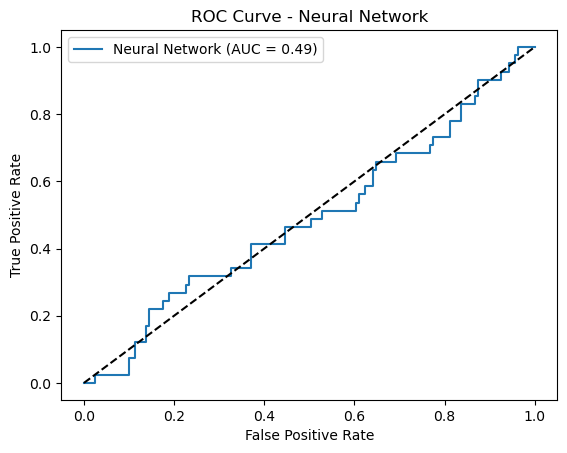

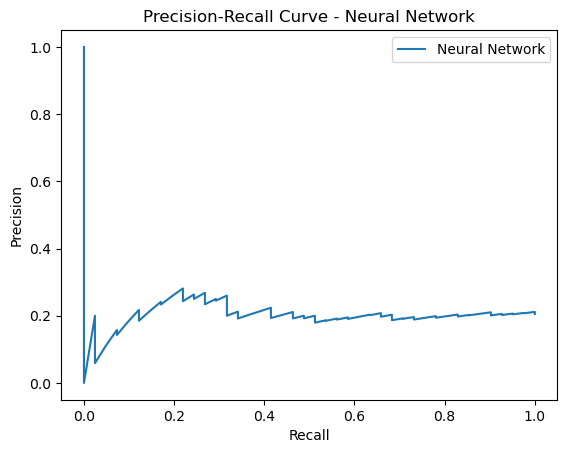

In [8]:
# Grid search and evaluation
best_models = {}
importances = {}

for name, model in models.items():
    print(f"\nTuning and evaluating {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1, error_score='raise')
    try:
        # fix column names for XGBoost
        X_resampled.columns = X_resampled.columns.str.replace(r"[\[\]<>]", "", regex=True)
        X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)

        # Train all models
        grid.fit(X_resampled, y_resampled)
        best_models[name] = grid.best_estimator_
        y_pred = grid.predict(X_test)
        y_proba = grid.predict_proba(X_test)[:, 1] if hasattr(grid, "predict_proba") else None

        # Print evaluation metrics
        print("Best Parameters:", grid.best_params_)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("F1 Score:", f1_score(y_test, y_pred))

        if y_proba is not None:
            print("ROC-AUC:", roc_auc_score(y_test, y_proba))

            # Plot ROC Curve
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.figure()
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve - {name}")
            plt.legend()
            plt.show()

            # Plot Precision-Recall Curve
            precision, recall, _ = precision_recall_curve(y_test, y_proba)
            plt.figure()
            plt.plot(recall, precision, label=f"{name}")
            plt.xlabel("Recall")
            plt.ylabel("Precision")
            plt.title(f"Precision-Recall Curve - {name}")
            plt.legend()
            plt.show()

        # Feature importance (if available)
        if hasattr(grid.best_estimator_, 'feature_importances_'):
            importances[name] = grid.best_estimator_.feature_importances_
    except Exception as e:
        print(f"Model {name} failed during GridSearchCV: {e}")

**Interpretation:**

- `Logistic Regression` has a slightly better recall than other models, making it marginally more helpful for flagging potential churners.

- `Random Forest` prioritizes accuracy on the majority class but fails to capture churners effectively despite high overall accuracy (**69%**).

- `XGBoost` performs worst among the three in identifying churners, possibly over-regularized or constrained by hyperparameters.

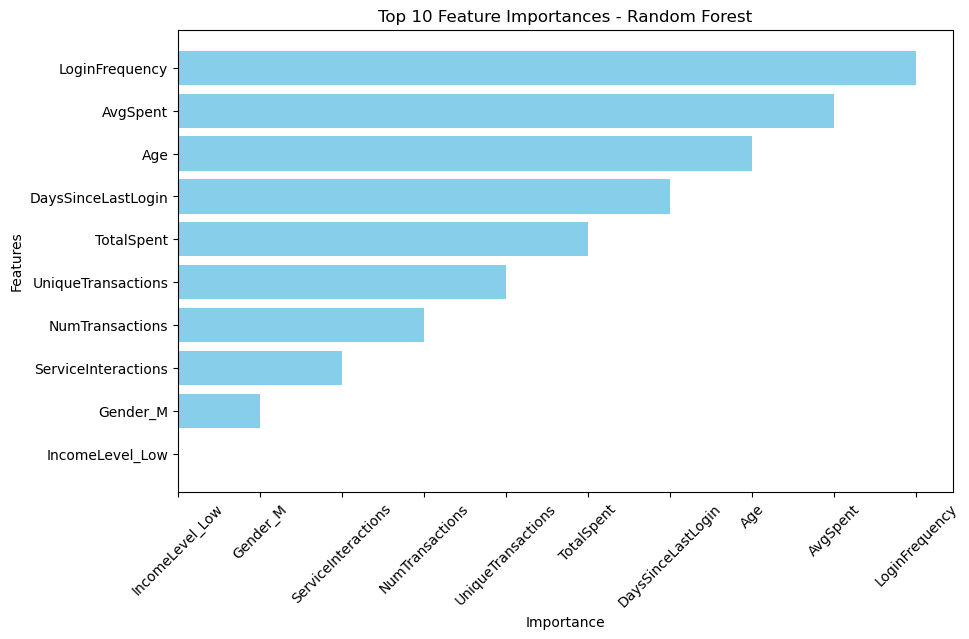

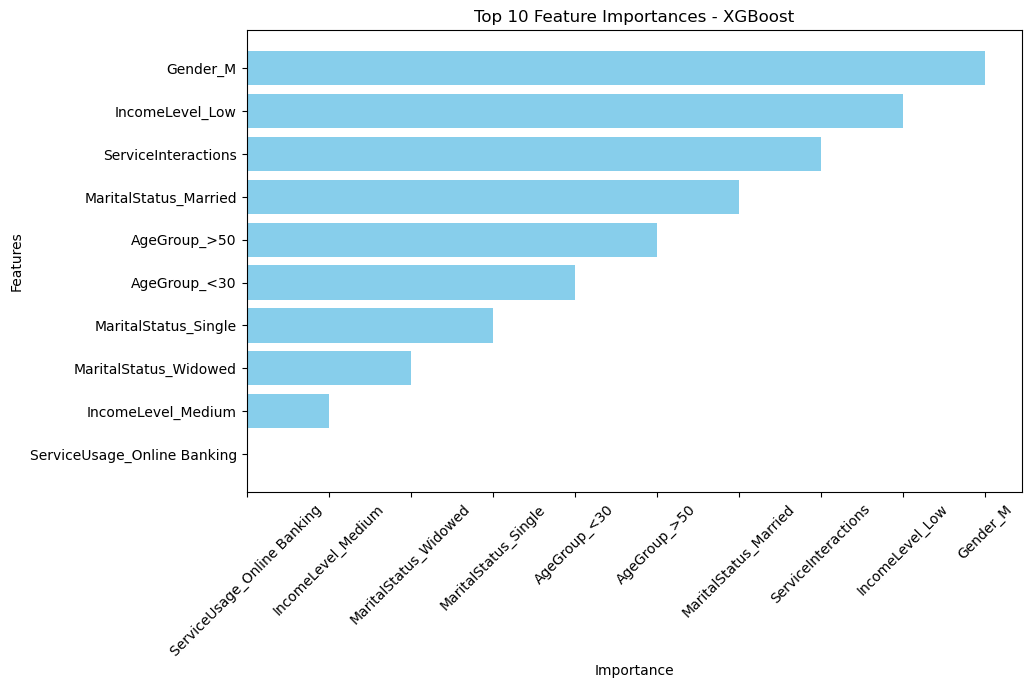

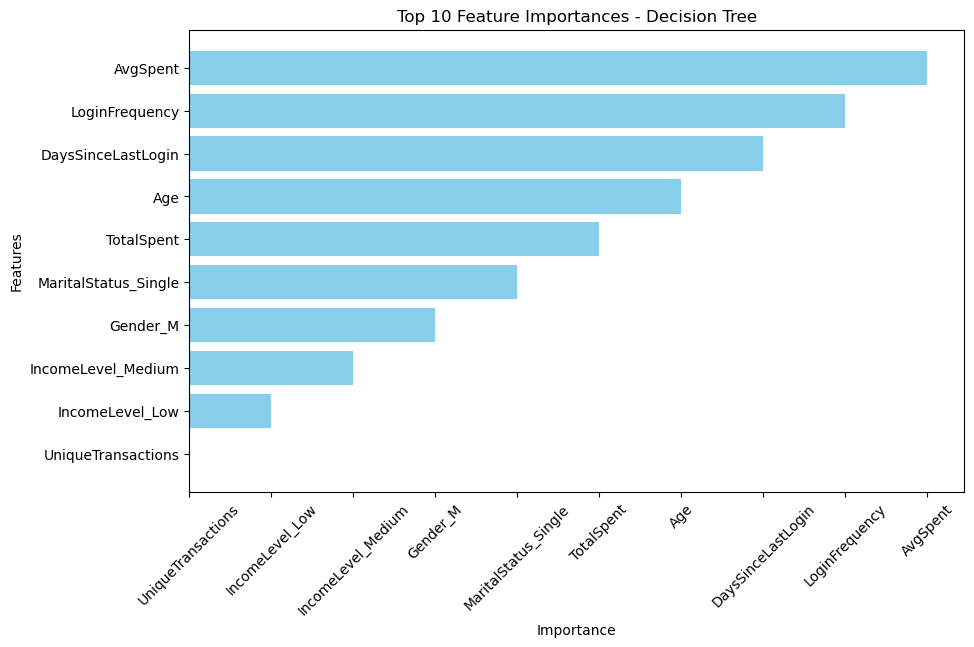

In [10]:
# Plot feature importances for tree-based models
for name in importances:
    plt.figure(figsize=(10, 6))
    sorted_idx = np.argsort(importances[name])[-10:]
    plt.barh(range(len(sorted_idx)), np.array(X.columns)[sorted_idx], color='skyblue')
    plt.title(f"Top 10 Feature Importances - {name}")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.xticks(rotation=45)
    plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
    plt.show()